# Project 4: Cellular Automata

## Random Walker

In [1]:
from vpython import *
import math
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>

In [10]:
dt = 0.01
def randomWalker(steps,vis):
    x,y=0,0
    poss = [(x,y)]
    if vis == True:
        scene = canvas()
        walker = sphere(pos=vector(0, 0, 0), radius=0.75, color=color.red, make_trail=True)
    count = 0
    
    while(count<steps):
        rate(10)
        direction = np.random.choice(['left', 'right', 'up', 'down'])

        if vis == True:
            if direction == 'left':
                walker.pos.x -=1
            elif direction == 'right':
                walker.pos.x +=1
            elif direction == 'up':
                walker.pos.y +=1
            else:
                walker.pos.y -=1
        else:
            if direction == 'left':
                x -=1
            elif direction == 'right':
                x+=1
            elif direction == 'up':
                y+=1
            else:
                y-=1
        count+=1
        poss.append((x,y))
    return poss

In [11]:
x = randomWalker(100,True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Results

Running multiple trials of the random generator and creating a histogram of the results demonstrates that the randomness is uniformly distributed among the four directions. Running multiple trials ensures that the data set is not biased or lacking in data. 

In theory, running 10,000 trials should result in each direction being selected 2,500 times if the randomness is uniformly distributed. In the histogram below, it is shown that each direction is picked relatively 2,500 times.

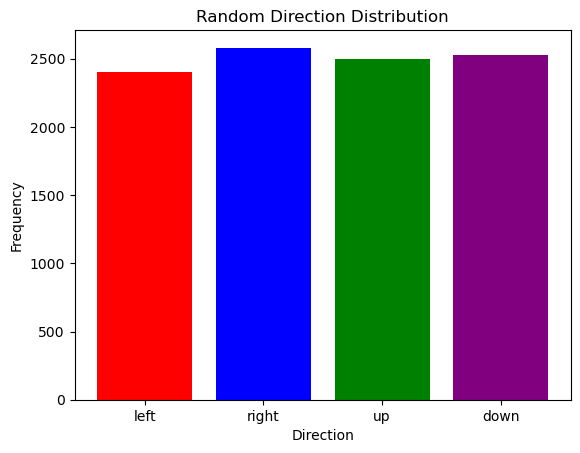

In [12]:
def graphRandomTrials(trials=10000):
    choices = [np.random.choice(['left', 'right', 'up', 'down']) for _ in range(trials)]
    counts = [choices.count(dir) for dir in ['left', 'right', 'up', 'down']]
    
    plt.bar(['left', 'right', 'up', 'down'], counts, color=['red', 'blue', 'green', 'purple'])
    plt.xlabel("Direction")
    plt.ylabel("Frequency")
    plt.title("Random Direction Distribution")
    plt.show()

graphRandomTrials()

In [13]:
def mulRandomWalker(trials,steps,vis):
    """Simulate multiple random walks and compute average distance"""
    distances = []
    for _ in range(trials):
        positions = randomWalker(steps,False)
        x_final, y_final = positions[-1]
        distance = np.sqrt(x_final**2 + y_final**2)
        distances.append(distance)
    
    avg_distance = np.mean(distances)
    expected_distance = np.sqrt(steps)
    
    print("Average distance:",avg_distance)
    print("Expected distance:",expected_distance)

mulRandomWalker(10,100,False)

Average distance: 10.370829136839273
Expected distance: 10.0


## Cellular Automaton

### Rule 150

In [14]:
def rule150(left, center, right):
    rule = {
        (1, 1, 1): 1,
        (1, 1, 0): 0,
        (1, 0, 1): 0,
        (1, 0, 0): 1,
        (0, 1, 1): 0,
        (0, 1, 0): 1,
        (0, 0, 1): 1,
        (0, 0, 0): 0
    }
    return rule[(left, center, right)]

In [15]:
def generateCellularAutomoton(rule, size, steps):
    grid = np.zeros((steps, size), dtype=int)
    grid[0, size // 2] = 1 
    
    for t in range(1, steps):
        for i in range(1, size - 1):
            grid[t, i] = rule(grid[t - 1, i - 1], grid[t - 1, i], grid[t - 1, i + 1])
    
    return grid

In [16]:
def plotAutomoton(grid):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap="binary", interpolation="nearest")
    plt.xlabel("Cell")
    plt.ylabel("Time Step")
    plt.title("Rule 150")
    plt.show()

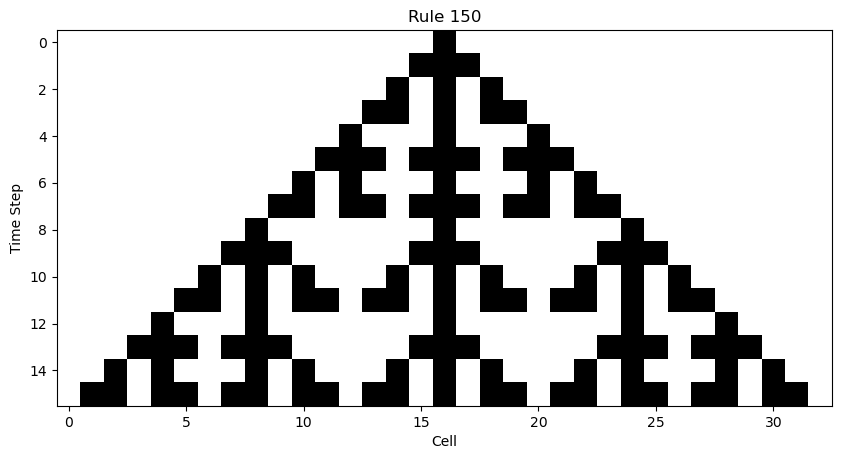

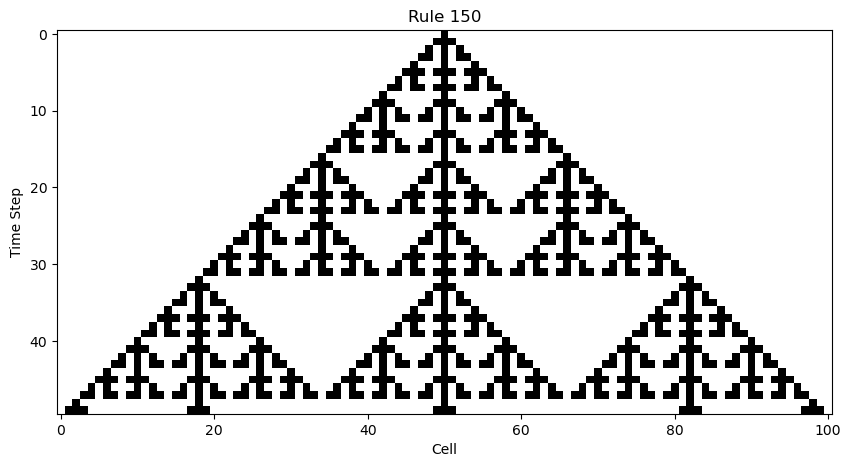

In [17]:
size = 33 # cells in a row
steps = 16  # columns

grid = generateCellularAutomoton(rule150, size, steps)
plotAutomoton(grid)

size = 101
steps = 50
grid = generateCellularAutomoton(rule150, size, steps)
plotAutomoton(grid)

### Results

I chose rule 150 because I felt as though the pattern was more complex and therefore more visually appealing. I chose to make the size 33 and steps 16 because I wanted to be able to visually compare to the Rule 150 example on the Wolfram site. In comparison to the Rule 150 graph on the site and mine, they are exactly identical, which verifies my code. Changing the binary rule makes the code adaptable to any other rule as well.

Choosing a bigger size and step makes for a more complex image as you can see in the second graph.

## Conway's Game of Life

### Synchronous Updating

In [2]:
gridsize = 50  
cellsize = 0.2 
num_generations = 100 

In [3]:
def findNeighbors(grid, x, y):
    total = 0
    for i in range(x - 1, x + 2):  
        for j in range(y - 1, y + 2):
            if i == x and j == y: 
                continue
            if 0 <= i < gridsize and 0 <= j < gridsize:
                total += grid[i, j]
    return total

In [4]:
def rules(grid):
    new_grid = np.zeros_like(grid)
    for i in range(gridsize):
        for j in range(gridsize):
            neighbors = findNeighbors(grid, i, j)
            if grid[i, j] == 1: # alive cell
                if neighbors < 2 or neighbors > 3:  # death
                    new_grid[i, j] = 0
                else:  
                    new_grid[i, j] = 1
            else:  # dead cell
                if neighbors == 3: # "birth"
                    new_grid[i, j] = 1
    return new_grid

In [5]:
def blinker(grid):
    grid[gridsize // 2, gridsize // 2 - 1:gridsize // 2 + 2] = 1
    return grid

def toad(grid):
    center_x = gridsize // 2
    center_y = gridsize // 2

    grid[center_x, center_y] = 1
    grid[center_x + 1, center_y] = 1
    grid[center_x + 2, center_y] = 1
    
    grid[center_x + 1, center_y + 1] = 1
    grid[center_x + 2, center_y + 1] = 1
    grid[center_x + 3, center_y + 1] = 1

    return grid

In [6]:
def asynchRules(grid):
    new_grid = grid.copy()
    indices = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    np.random.shuffle(indices)
    
    for i, j in indices:
        neighbors = count_neighbors(grid, i, j)
        if grid[i, j] == 1:  # alive cell
            if neighbors < 2 or neighbors > 3:  # death
                new_grid[i, j] = 0
            else:  
                new_grid[i, j] = 1
        else:  # dead cell
            if neighbors == 3:  # birth
                new_grid[i, j] = 1
    
    return new_grid

In [7]:
def conwaysGameOfLife(sets,rule):
    # create the grid
    if sets=="blinker":
        grid = np.zeros((gridsize, gridsize), dtype=int)
        grid = blinker(grid)
    elif sets=="toad":
        grid = np.zeros((gridsize, gridsize), dtype=int)
        grid = toad(grid)
    else:
        grid = np.random.randint(2, size=(gridsize, gridsize), dtype=int)
        
    scene = canvas()
    cells = []
    for i in range(gridsize):
        row = []
        for j in range(gridsize):
            cell = box(pos=vector(i * cellsize - gridsize * cellsize / 2,
                                 j * cellsize - gridsize * cellsize / 2, 0),
                       size=vector(cellsize, cellsize, 0.1),
                       color=color.white if grid[i, j] == 0 else color.red)
            row.append(cell)
        cells.append(row)
        
    for gen in range(num_generations):
        rate(10)  
        if rules=="asynch":
            grid = asynchRules(grid)
        else:
            grid = rules(grid)
        for i in range(gridsize):
            for j in range(gridsize):
                if grid[i, j] == 1:
                    cells[i][j].color = color.red
                else:
                    cells[i][j].color = color.white 
    
        time.sleep(0.5) 

In [8]:
x = conwaysGameOfLife("blinker","")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [28]:
x = conwaysGameOfLife("toad","")

<IPython.core.display.Javascript object>

In [9]:
x = conwaysGameOfLife("","")

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

### Results

When using the blinking and toad oscillator on their own, we can see that their behavior matches the correct behavior that they should. This ensures that the simulation is following the rules as they should. In the larger random simulation, we can see these behaviors as well when there are still lifes or oscillators scattered throughout the simulation. The correct behavior in isolated cases verifies that the behavior is correct on a larger scale.

## Asynchronous Updating

In [9]:
x = conwaysGameOfLife("blinker","asynch")

<IPython.core.display.Javascript object>

In [10]:
x = conwaysGameOfLife("toad","asynch")

<IPython.core.display.Javascript object>

In [10]:
x = conwaysGameOfLife("","asynch")

<IPython.core.display.Javascript object>

### Results

For the asynchronous updating version of Conwway's Game of Life, I chose to use the random order scheme. I chose to use random order because I thought the unpredictability of the cell updating could reveal more visually different behavior from the synchronous updating. 

In the simulation, the oscillators and still lifes behaved the same way. This can be seen in the isolated simulations of the blinker and toad, as well as the final larger simulation. In the larger simulation, the element of the random order scheme allows for the oscillators and still lifes to sometimes only be partly affected after one update, which then affects the following update. In short, when a still life or oscillator is affected, parts of it can remain before it fully changes.